### Домашнее задание

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

### Реализация алгоритма kNN<a class='anchor' id='implement_knn'>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

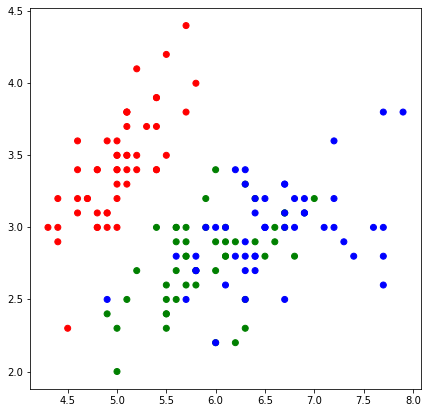

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [192]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
        
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [212]:
def get_graph(X_train, y_train, k, knn):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [194]:
# X_test

In [195]:
# {class_item: 0 for class_item in set(y_train)}

In [208]:
def knn_w1(x_train, y_train, x_test, k):
    
    q = 0.25
    answers = []
    for x in x_test:
        weights = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            w = q ** distance #ИЗМЕНЕНИЯ: подсчет веса от расстояния.
                       
            # Записываем в список значение весов и ответа на объекте обучающей выборки
            weights.append((w, y_train[i])) # ИЗМЕНЕНИЯ: записываем не расстояние, а вес
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(weights, reverse=True)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    
    return answers

Напишем функцию для вычисления точности

In [209]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [245]:
k = 3

y_pred = knn_w1(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.767


(58800, 2)


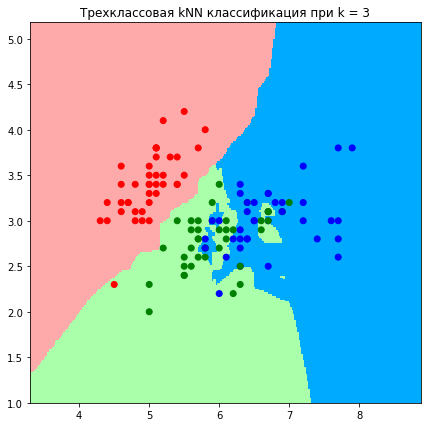

CPU times: user 2min 40s, sys: 1.19 s, total: 2min 41s
Wall time: 2min 54s


In [246]:
%%time
get_graph(X_train, y_train, k, knn_w1)

In [243]:
def knn_w2(x_train, y_train, x_test, k):
    
    q = 0.5
    answers = []
    for x in x_test:
        weights = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            
            w = (q ** i) * distance # ИЗМЕНЕНИЯ: подсчет веса по номеру соседа.

                       
            # Записываем в список значение весов и ответа на объекте обучающей выборки
            weights.append((w, y_train[i])) # ИЗМЕНЕНИЯ: записываем не расстояние, а вес
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(weights)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    
    return answers

In [247]:
k = 3

y_pred = knn_w2(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.367


(58800, 2)


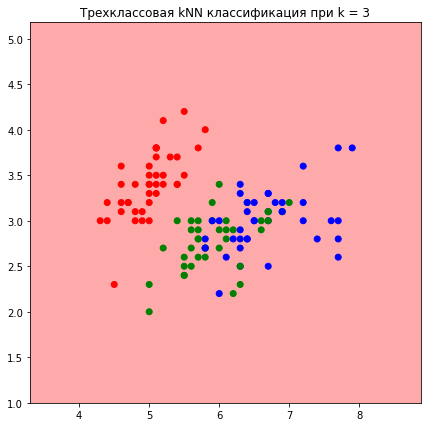

CPU times: user 2min 38s, sys: 1.38 s, total: 2min 39s
Wall time: 2min 43s


In [248]:
%%time
get_graph(X_train, y_train, k, knn_w2)

In [231]:
def knn_w3(x_train, y_train, x_test, k):
    
    q = 0.25
    answers = []
    for x in x_test:
        weights = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            if i > 0:  # ИЗМЕНЕНИЯ: подсчет веса по номеру соседа
                w = (1 / i) * distance
            else:
                i_i = 1e-5
                w = (1 / i_i) * distance
                       
            # Записываем в список значение весов и ответа на объекте обучающей выборки
            weights.append((w, y_train[i])) # ИЗМЕНЕНИЯ: записываем не расстояние, а вес
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(weights)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    
    return answers

In [249]:
k = 3

y_pred = knn_w3(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.700


(58800, 2)


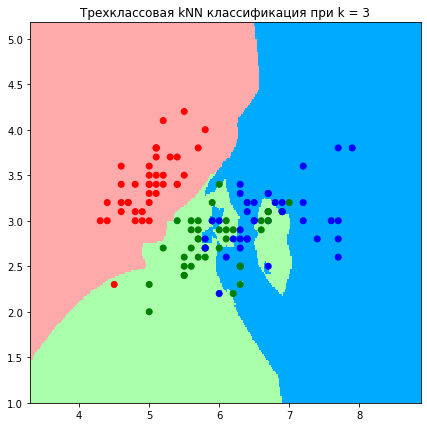

CPU times: user 2min 37s, sys: 1.1 s, total: 2min 38s
Wall time: 2min 46s


In [250]:
%%time
get_graph(X_train, y_train, k, knn_w3)